# Lesson 0033 - Reuters Classification Neural Network
After having introduced keras in the [last lesson](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0032_mnist_classification_neural_network_keras.ipynb) and introduced the basics of language processing in the [lesson before](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0031_introduction_to_natural_language_processing.ipynb), we now attempt to classify the [Reuters data set](https://keras.io/datasets/).<br>
We start by stealing code from [lesson 0032](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0032_mnist_classification_neural_network_keras.ipynb) and loading and exploring the Reuters data set.

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


By manipulating [num_words](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters/load_data) to $10000$, we restrict the data set to contain only the $10000$ most frequent words.

In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.reuters.load_data( num_words = 10000 )

Let us explore the data:

In [3]:
train_x[ 0 ]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
train_y[ 0 ]

3

Seems like the newswires are encoded into integers, where each integer represents a word. Let's use [get_word_index](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters/get_word_index) to translate these arrays into text:

In [5]:
word_index = tf.keras.datasets.reuters.get_word_index()

reverse_word_index = dict( [ ( value, key ) for ( key, value ) in word_index.items() ] )

Before we map the first item in the training data set back to words, we have to consider, that the integers $0$, $1$ and $2$ are reserved words.

In [6]:
first_text = ""

for i in train_x[ 0 ]:
    
    first_text = first_text + reverse_word_index.get( i - 3, '?' ) + " "
    
print( first_text )

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3 


Next, we one hot encode the data. Thereby we will implicitly drop the frequency of words in documents, and also the sequence in which words will appear.

In [7]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


But before we can encode the label data, we first must find out, how many unique labels there are:

In [8]:
len( np.unique( train_y ) )

46

In [9]:
train_x_encoded = np.zeros( shape = [ len( train_y ), 10000 ], dtype = np.int32 )

test_x_encoded = np.zeros( shape = [ len( test_y ), 10000 ], dtype = np.int32 )

train_y_encoded = np.zeros( shape = [ len( train_y ), 46 ], dtype = np.int32 )

test_y_encoded = np.zeros( shape = [ len( test_y ), 46 ], dtype = np.int32 )





for i in range( len( train_x ) ):
    
    for j in range( len( train_x[ i ] ) ):
        
        train_x_encoded[ i, train_x[ i ][ j ] ] = 1
        
        
        
for i in range( len( test_x ) ):
    
    for j in range( len( test_x[ i ] ) ):
        
        test_x_encoded[ i, test_x[ i ][ j ] ] = 1
        
        
        
for i in range( len( train_x ) ):
    
    train_y_encoded[ i, train_y[ i ] ] = 1
        
        
        
for i in range( len( test_x ) ):
    
    test_y_encoded[ i, test_y[ i ] ] = 1
    
    
    
    
train_x = train_x_encoded

train_y = train_y_encoded

test_x = test_x_encoded

test_y = test_y_encoded

Now, we can actually build the model. We will use two consecutive dense layers of $10000$ nodes each, leaky relu as activation and softmax for the output layer. We steal code from [lesson 0032](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0032_mnist_classification_neural_network_keras.ipynb).

In [10]:
import keras
from keras import models
from keras import layers

print( keras.__version__ )

2.2.4


Using TensorFlow backend.


In [11]:
network = models.Sequential()

network.add( layers.Dense( 10000, activation = layers.LeakyReLU( alpha = 0.3 ), 
                          input_shape = ( 10000, ) ) )

network.add( layers.Dense( 10000, activation = layers.LeakyReLU( alpha = 0.3 ), 
                          input_shape = ( 10000, ) ) )

network.add( layers.Dense( 46, activation = "softmax" ) )

network.compile( optimizer = keras.optimizers.SGD( lr = 0.1, momentum = 0.0, decay = 0.0, nesterov = False ),
               loss = "categorical_crossentropy", metrics = [ "accuracy" ] )

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\rhopi\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Since we want to look at the gain in performance during training, we use the __history__ object from [fit](https://keras.io/models/model/).<br>
We train for $40$ epochs.

In [12]:
history = network.fit( train_x, train_y, epochs = 40, batch_size = 100, validation_data = ( test_x, test_y ) )

Instructions for updating:
Use tf.cast instead.
Train on 8982 samples, validate on 2246 samples
Epoch 1/40
8982/8982 [==============================] - 11s 1ms/step - loss: 1.7159 - acc: 0.6035 - val_loss: 1.3965 - val_acc: 0.6950
Epoch 2/40
8982/8982 [==============================] - 6s 636us/step - loss: 1.1487 - acc: 0.7419 - val_loss: 1.1705 - val_acc: 0.7391
Epoch 3/40
8982/8982 [==============================] - 6s 639us/step - loss: 0.9114 - acc: 0.7948 - val_loss: 1.0647 - val_acc: 0.7511
Epoch 4/40
8982/8982 [==============================] - 6s 639us/step - loss: 0.7594 - acc: 0.8255 - val_loss: 0.9989 - val_acc: 0.7676
Epoch 5/40
8982/8982 [==============================] - 6s 640us/step - loss: 0.6287 - acc: 0.8572 - val_loss: 0.9968 - val_acc: 0.7769
Epoch 6/40
8982/8982 [==============================] - 6s 642us/step - loss: 0.5055 - acc: 0.8884 - val_loss: 0.9068 - val_acc: 0.7827
Epoch 7/40
8982/8982 [==============================] - 6s 642us/step - loss: 0.4479 - ac

In [13]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


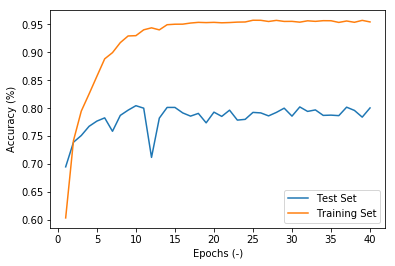

In [14]:
epochs = range( 1, len( history.history[ 'val_acc' ] ) + 1 )

plt.plot( epochs, history.history[ 'val_acc' ], label = "Test Set" )

plt.plot( epochs, history.history[ 'acc' ], label = "Training Set" )

plt.xlabel( "Epochs (-)" )

plt.ylabel( "Accuracy (%)" )

plt.legend()

We achieve an accuracy of $80\%$ on the test set, which is not too great but not bad either.<br>
Consider, that we only considered the occurence of words, but not how they are connected. For example: the sentences "Toyota buys BMW" has the same encoding as "BMW buys Toyota". With that in mind, the accuracy is actually quite good.<br>
Class dismissed.